### mplsoccer - Introducció

- *mplsoccer* és un mòdul que ens dóna accés a dades obertes de partits de futbol

- també aporta funcions específiques per analitzar/visualitzar aquestes dades

- hi ha altres mòduls d'aquest estil però són de pagament


In [1]:
#import requests
#from pandas import json_normalize
#events = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/8658.json')
#events = events.json()
#df = json_normalize(events, sep = '_')

Bàsicament ens interessen dues classes:

- Pitch és una classe per dibuixar el camp

In [1]:
from mplsoccer.pitch import Pitch

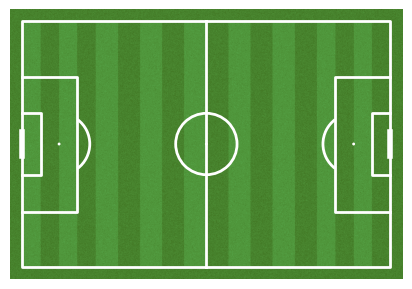

In [10]:
pitch = Pitch(pitch_color = 'grass', line_color = 'white', stripe = True)
fig, axs = pitch.draw(figsize = (5, 3))

- statsbomb és una submòdul que permet descarregar dades del servidor directament a un pd.DataFrame()

In [2]:
import mplsoccer.statsbomb as sb
import pandas as pd
pd.set_option('display.max.columns', None)

#### Funcionalitat bàsica:

- podem veure de quines competicions hi ha partits

In [3]:
df_competitions = sb.Sbopen().competition()
df_competitions.head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-12-12T07:43:33.436182,None,None,2023-12-12T07:43:33.436182
1,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
2,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
3,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00


In [4]:
df_competitions.groupby(['competition_name', 'competition_gender']).season_name.value_counts()

competition_name    competition_gender  season_name
1. Bundesliga       male                2015/2016      1
Champions League    male                1970/1971      1
                                        1971/1972      1
                                        1972/1973      1
                                        1999/2000      1
                                                      ..
UEFA Euro           male                2020           1
UEFA Europa League  male                1988/1989      1
UEFA Women's Euro   female              2022           1
Women's World Cup   female              2019           1
                                        2023           1
Name: season_name, Length: 70, dtype: int64

- localitzem la competició "La Liga", temporada 2008/2009 (el Barça de les 6 copes)

In [5]:
df_competitions.loc[(df_competitions.competition_name == 'La Liga') & (df_competitions.season_name == '2008/2009')]

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
47,11,41,Spain,La Liga,male,False,False,2008/2009,2023-04-19T10:46:29.203565,2021-06-13T16:17:31.694,None,2023-04-19T10:46:29.203565


- amb els valors de *competition_id* i *season_id* podem veure quins partits hi ha

In [18]:
df_match = sb.Sbopen().match(competition_id = 11, season_id = 41)
df_match[['match_id', 'match_date', 'home_team_name', 'away_team_name', 'home_score', 'away_score']].head()

,match_id,match_date,home_team_name,away_team_name,home_score,away_score
0,69225,2008-12-13,Barcelona,Real Madrid,2,0
1,69212,2008-10-04,Barcelona,Atlético Madrid,6,1
2,69235,2008-11-01,Málaga,Barcelona,1,4
3,69232,2008-10-25,Barcelona,Almería,5,0
4,69216,2009-03-07,Barcelona,Athletic Club,2,0


- el valor *match_id* ens permet descarregar dades d'un partit en concret, per exemple les alineacions

In [9]:
lineup = sb.Sbopen().lineup(69212)
lineup.groupby('team_name')[['player_id', 'player_nickname']].value_counts()

team_name        player_id  player_nickname        
Atlético Madrid  3237       Sergio Agüero              1
                 5504       Éver Banega                1
                 26502      Paulo Assunção             1
                 26391      Luis García                1
                 26124      Maxi Rodríguez             1
                 26120      Luis Perea                 1
                 26118      Antonio López              1
                 26083      Florent Sinama-Pongolle    1
                 26057      Mariano Pernía             1
                 23991      De las Cuevas              1
                 20256      Grégory Coupet             1
                 19731      Tomáš Ujfaluši             1
                 19728      Johnny Heitinga            1
                 6391       Raúl García                1
Barcelona        20176      Víctor Valdés              1
                 20169      Seydou Kéita               1
                 20131      Xavi    

- o descarregar totes les dades del partit, 

In [6]:
events, related, freeze, tactics = sb.Sbopen().event(69212)
events.head(100)

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,off_camera,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,sub_type_id,sub_type_name,body_part_id,body_part_name,x,y,pass_switch,under_pressure,outcome_id,outcome_name,counterpress,out,technique_id,technique_name,dribble_nutmeg,ball_recovery_recovery_failure,foul_won_defensive,pass_assisted_shot_id,pass_goal_assist,shot_statsbomb_xg,end_z,shot_key_pass_id,goalkeeper_position_id,goalkeeper_position_name,foul_committed_penalty,foul_won_penalty,pass_shot_assist,bad_behaviour_card_id,bad_behaviour_card_name,aerial_won,pass_cross,pass_cut_back,pass_no_touch,foul_committed_offensive,substitution_replacement_id,substitution_replacement_name,shot_first_time,shot_one_on_one,foul_committed_card_id,foul_committed_card_name,block_offensive,foul_committed_advantage,foul_won_advantage,pass_deflected
0,1e6f7e33-d7e8-40f5-b351-94fa0af84858,1,1,00:00:00,0,0,1,0.000000,69212,35,Starting XI,217,Barcelona,1,Regular Play,217,Barcelona,433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5dd82bbf-62cd-4a09-8315-b678744d5256,2,1,00:00:00,0,0,1,0.000000,69212,35,Starting XI,217,Barcelona,1,Regular Play,212,Atlético Madrid,442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bf426dea-daf4-4be1-b87c-efd98956426a,3,1,00:00:00,0,0,1,0.000000,69212,18,Half Start,217,Barcelona,1,Regular Play,217,Barcelona,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,d64279fd-a02d-413c-baf2-f2541fa997c4,4,1,00:00:00,0,0,1,0.000000,69212,18,Half Start,217,Barcelona,1,Regular Play,212,Atlético Madrid,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ec5c278f-0e80-4c42-8bc5-24cc3d86e573,5,1,00:00:00.410000,0,0,2,4.963368,69212,30,Pass,217,Barcelona,9,From Kick Off,217,Barcelona,None,1.0,19298.0,Samuel Eto''o Fils,23.0,Center Forward,5203.0,Sergio Busquets i Burgos,14.946571,2.925826,1.0,Ground Pass,45.4,43.2,65.0,Kick Off,40.0,Right Foot,60.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,65b566dd-30d1-4171-bd5b-56c6d7852e40,95,1,00:01:31.243000,1,31,5,NaN,69212,42,Ball Receipt,212,Atlético Madrid,8,From Keeper,212,Atlético Madrid,None,NaN,26083.0,Florent Sinama-Pongolle,24.0,Left Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.8,36.5,NaN,NaN,9.0,Incomplete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,63e6212e-4692-4c79-bfdb-af4cd2c11fa6,96,1,00:01:31.243000,1,31,5,0.000000,69212,9,Clearance,212,Atlético Madrid,8,From Keeper,217,Barcelona,None,NaN,20125.0,Carles Puyol i Saforcada,2.0,Right Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0

In [7]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3640 entries, 0 to 3639
Data columns (total 75 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3640 non-null   object 
 1   index                           3640 non-null   int64  
 2   period                          3640 non-null   int64  
 3   timestamp                       3640 non-null   object 
 4   minute                          3640 non-null   int64  
 5   second                          3640 non-null   int64  
 6   possession                      3640 non-null   int64  
 7   duration                        2647 non-null   float64
 8   match_id                        3640 non-null   int64  
 9   type_id                         3640 non-null   int64  
 10  type_name                       3640 non-null   object 
 11  possession_team_id              3640 non-null   int64  
 12  possession_team_name            36

#### Dataset

- per l'exemple que treballarem a continuació construim un dataset amb temps/posicions d'events relacionats amb en Messi (*player_id* = 5503)

- la funció *isin(5503).any(axis = 1)* comprova (per files) si el valor 5503 existeix en qualsevol de les columnes

In [8]:
locs = events[events.isin([5503]).any(axis = 1)][['period', 'timestamp', 'duration', 'x', 'y', 'end_x', 'end_y','type_id', 'type_name']]
locs.sort_values(by = ['period', 'timestamp'], inplace = True)
locs.head()

,period,timestamp,duration,x,y,end_x,end_y,type_id,type_name
98,1,00:01:32.943000,0.000000,53.9,37.8,NaN,NaN,2,Ball Recovery
99,1,00:01:32.943000,0.275743,53.9,37.8,53.5,35.9,43,Carry
101,1,00:01:33.219000,0.000000,53.5,35.9,NaN,NaN,14,Dribble
102,1,00:01:33.219000,3.642478,53.5,35.9,52.2,27.0,43,Carry
103,1,00:01:36.861000,1.285932,52.2,27.0,63.6,44.3,30,Pass


- l'*scatterplot* ens situa aquests events en el camp (coordenades *x*, *y*)
- separem els events per períodes

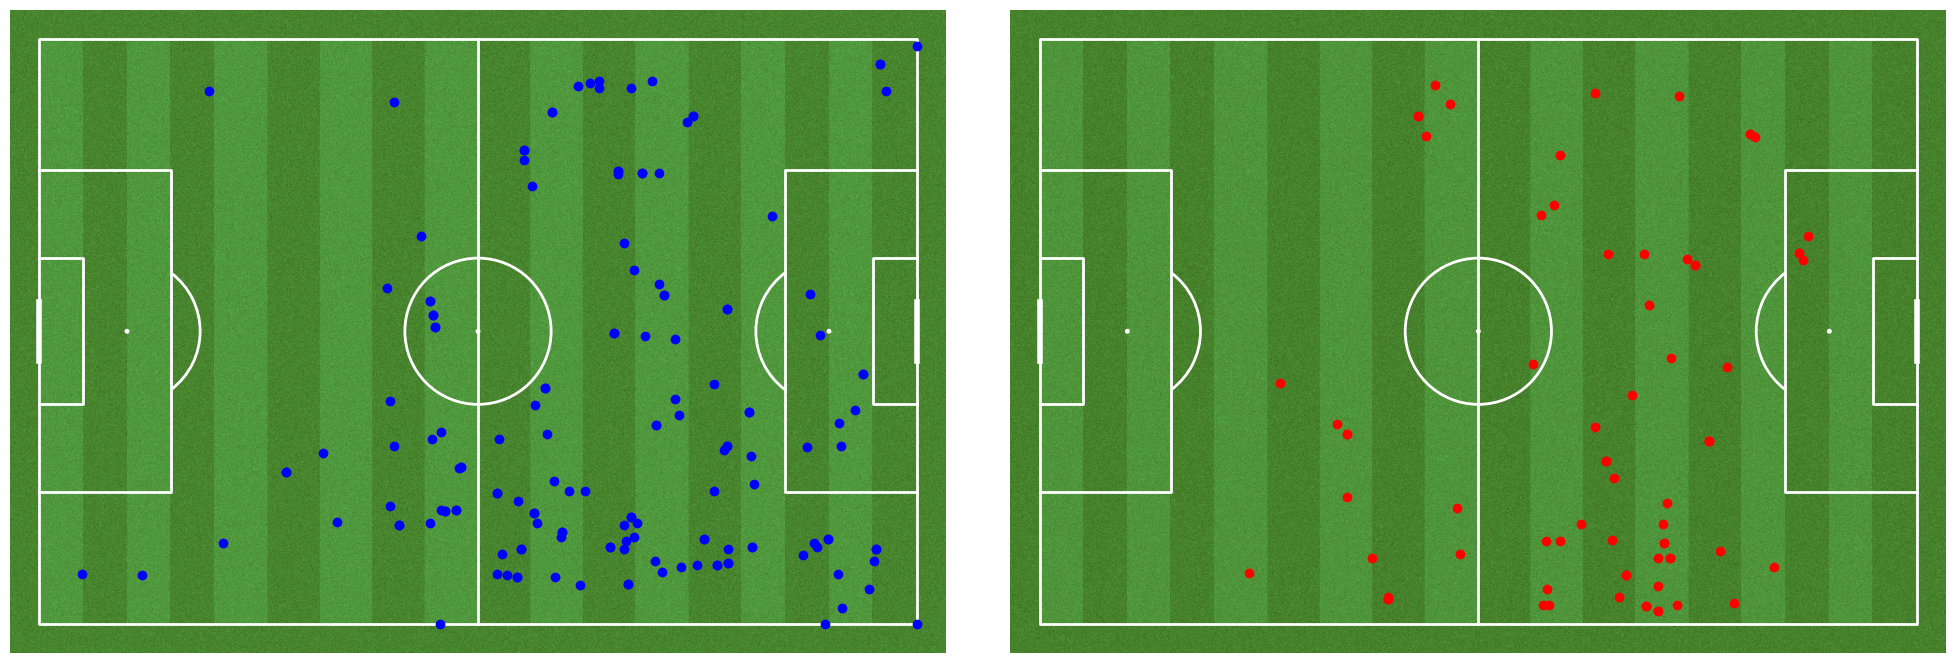

In [11]:
fig, axs = pitch.grid(nrows = 1, ncols = 2, space = 0.1, title_height = 0, endnote_height = 0)
axs[0].scatter(locs.x[locs.period == 1], locs.y[locs.period == 1], c = 'b')
axs[1].scatter(locs.x[locs.period == 2], locs.y[locs.period == 2], c = 'r');